In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EXERCISE 1


In [69]:
S_0 = 75  # mm
k = 0.01  # per day
t_0 = 0  # day
t_max = 200  # days
dt = 10  # day(s)
alpha = 1

In [70]:
def analitical_solve(t):

    S =  S_0*np.exp(-k*(t-t_0))
    
    return S


In [71]:
def numerical_solve(S):
    S2 = S - dt*k*S**alpha
    return S2

In [72]:
t = np.arange(t_0, t_max+1, dt)
S_an = np.zeros(len(t))
S_an[0] = S_0

for i in range(1,len(t)):
    S_an[i] = analitical_solve(t[i])

S_num = np.zeros(len(t))
S_num[0] = S_0

for i in range(len(t)-1):
    S_num[i+1] = numerical_solve(S_num[i])

print(S_an)




[75.         67.86280635 61.40480648 55.56136655 50.27400345 45.48979948
 41.16087271 37.24389778 33.69967231 30.49272448 27.59095809 24.96533128
 22.58956589 20.43988448 18.4947723  16.73476201 15.14223885 13.7012643
 12.39741662 11.21764644 10.15014624]


In [73]:
print(S_num)

[75.         67.5        60.75       54.675      49.2075     44.28675
 39.858075   35.8722675  32.28504075 29.05653668 26.15088301 23.53579471
 21.18221524 19.06399371 17.15759434 15.44183491 13.89765142 12.50788627
 11.25709765 10.13138788  9.11824909]


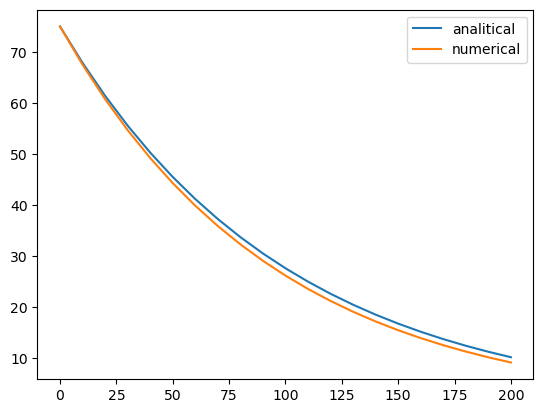

In [74]:
plt.plot(t,S_an, label = 'analitical')
plt.plot(t,S_num, label = 'numerical')
plt.legend()

In [75]:
range(1,len(t))

range(1, 21)

In [80]:
filepath = 'P_PE_date.txt'

station = df = pd.read_csv(filepath, delim_whitespace=True, header=None)
station.columns = ['Year', 'Month', 'Day', 'P', 'EV']
station['Date'] = pd.to_datetime(station[['Year', 'Month', 'Day']])
station.set_index('Date', inplace=True)
station = station[['P', 'EV']]
station.head()

C:\Users\Unieuro\AppData\Local\Temp\ipykernel_33696\1400820012.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  station = df = pd.read_csv(filepath, delim_whitespace=True, header=None)


,P,EV
Date,,
2001-10-01,12.797151,1.646462
2001-10-02,0.290746,1.929183
2001-10-03,22.964954,1.562004
2001-10-04,0.000000,1.278364
2001-10-05,0.011281,1.194978


In [83]:
station['S'] = pd.Series()

station.head()

C:\Users\Unieuro\AppData\Local\Temp\ipykernel_33696\3514251655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['S'] = pd.Series()


,P,EV,S
Date,,,
2001-10-01,12.797151,1.646462,NaN
2001-10-02,0.290746,1.929183,NaN
2001-10-03,22.964954,1.562004,NaN
2001-10-04,0.000000,1.278364,NaN
2001-10-05,0.011281,1.194978,NaN


In [91]:
def numerical_solve_external(S,P,EV):
    S2 = S + dt*(P-EV) - dt*k*S**alpha
    return S2

669
669
                    P        EV          S         Q
Date                                                
2001-10-01  12.797151  1.646462  75.000000  7.500000
2001-10-02   0.290746  1.929183  78.650689  7.865069
2001-10-03  22.964954  1.562004  69.147183  6.914718
2001-10-04   0.000000  1.278364  83.635414  8.363541
2001-10-05   0.011281  1.194978  73.993509  7.399351


C:\Users\Unieuro\AppData\Local\Temp\ipykernel_33696\3887521155.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['Q'] = Q
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_33696\3887521155.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['S'] = S_num


Text(0, 0.5, '[m^3/s]')

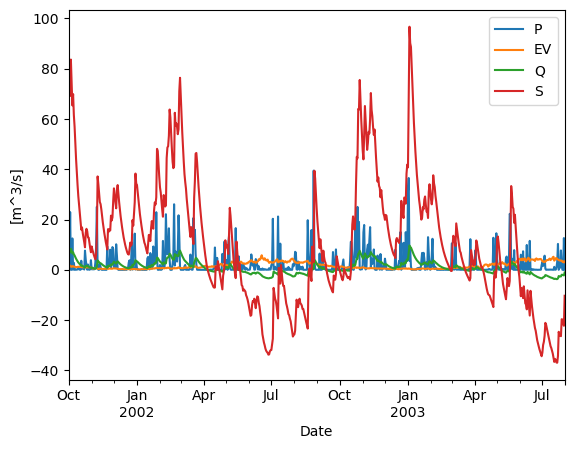

In [108]:
P = np.array(station['P'])
EV = np.array(station['EV'])

print(len(P))

dt = 1
S_0 = 75  # mm
k = 0.1  # per day
t_0 = 0  # day
t_max = len(P)  # days
dt = 1  # day(s)
alpha = 1


t = np.arange(0,t_max,dt)
S_num = np.zeros(len(t))
S_num[0] = S_0


for i in range(len(t)-1):
    S_num[i+1] = numerical_solve_external(S_num[i], P[i], EV[i])

Q = k*S_num**alpha
print(len(Q))
station['Q'] = Q
station['S'] = S_num

print(station.head())

station['P'].plot(label = 'P')
station['EV'].plot(label = 'EV')
station['Q'].plot(label = 'Q')
station['S'].plot(label = 'S')
plt.legend()
plt.ylabel('[m^3/s]')

EXERCISE 2